# HeatMap for WoW Token Prices

Map all of the available data in the JSON available from https://wowtoken.info/ for each region to view the data by timeslots for each day of the week

**All times are in UTC**

In [165]:
#!/usr/bin/env python

%pylab inline

from urllib2 import urlopen
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.set_option('chained_assignment',None)

# Test data URL
# _TOKEN_DATA_URL = 'https://github.com/kxseven/wow-token-price-heatmap/master/testdata/wowtoken.csv'

# Live URL
_TOKEN_DATA_URL = 'https://wowtoken.info/wowtoken.csv'

_DATA_COL_NAMES = [ 'Region', 'UTC Date', 'Buy Price' ]


def get_regional_pricemap(history, region, max_age=14):
    """Build a HexBin heapmap for prices in a given region"""

    df_region = history[history['Region'] == region]

    days_of_week = [ 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat' ]
    filtered_fields = ['Day', 'Hour', 'Buy Price']
    grouped_fields = ['Day', 'Hour']
    ordered_hours = [ str(x) for x in np.arange(24) ]
    ordered_days = [ 1, 2, 3, 4, 5, 6, 0 ]

    df_region['Epoch'] = df_region['UTC Date'].apply(lambda x: int(time.strftime('%s', time.strptime(x, '%Y-%m-%d %H:%M:%S'))))
    df_region['Hour'] = df_region['UTC Date'].apply(lambda x: time.strftime('%-H', time.strptime(x, '%Y-%m-%d %H:%M:%S')))
    df_region['Day'] = df_region['UTC Date'].apply(lambda x: time.strftime('%w', time.strptime(x, '%Y-%m-%d %H:%M:%S')))
    df_region['Buy Price'] = df_region['Buy Price'].apply(lambda x: int(x))

    # Now remove data older than N days
    from datetime import datetime, timedelta
    epoch_N_days_ago = time.mktime((datetime.now() - timedelta(days=max_age)).timetuple())
    df_region = df_region[df_region.Epoch >= epoch_N_days_ago]
    
    num_data_rows = len(df_region.index)
    
    df_filtered = df_region[filtered_fields]
    
    grouped = df_filtered.groupby(grouped_fields, sort=True).mean()['Buy Price'].unstack(-1)
    grouped = grouped[ordered_hours]

    cmap = plt.cm.jet
    cmap.set_bad('grey')
    
    # Plot it out
    fig, ax = plt.subplots(figsize=(14,7))
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
    heatmap = ax.imshow(grouped, cmap=cmap, interpolation='nearest', aspect='auto')
    
    cb = fig.colorbar(heatmap)
    cb.set_label('Token Price')
    fig = plt.gcf()
    ax.set_title('WoW Token Prices - Region: {} [{} samples in last {} days]'.format(region, num_data_rows, max_age))
    ax.set_xticks(np.arange(grouped.shape[1]), minor=False)
    ax.invert_yaxis()
    ax.set_xticklabels(grouped.columns, minor=False)
    ax.set_yticklabels(days_of_week, minor=False)
    plt.axis([0, 24, 0, 7])
    plt.xticks(rotation=45)
    plt.gca().invert_yaxis()

    # fig.savefig('wow_token_heatmap_{}.svg'.format(region), bbox_inches='tight', format='svg')
    plt.show()


all_history = pd.read_csv(
    urlopen(_TOKEN_DATA_URL),
    names=_DATA_COL_NAMES,
    na_values=[''],
    keep_default_na=False
    )


Populating the interactive namespace from numpy and matplotlib


## European Realms

**All times are in UTC**

 - Grey areas in the chart below represent times where no data is available

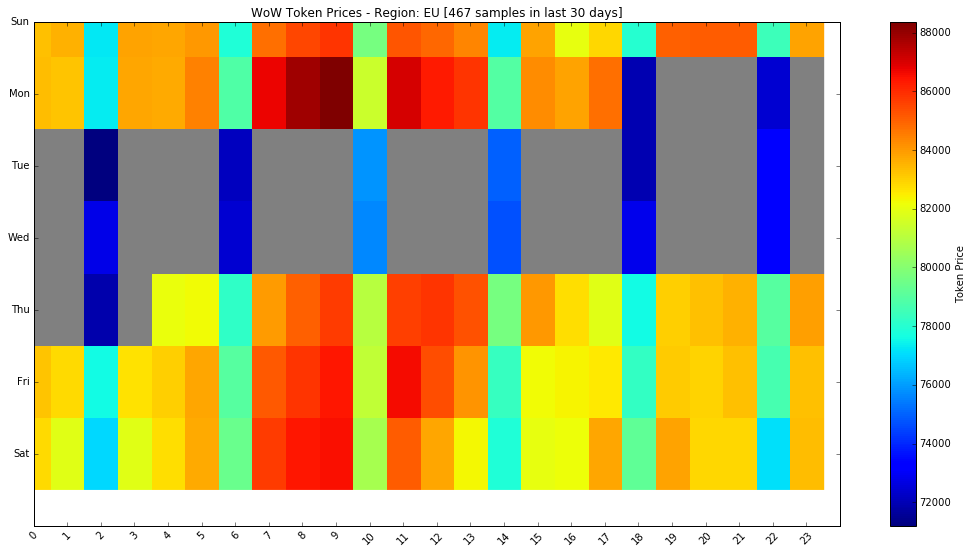

In [166]:
get_regional_pricemap(all_history, 'EU')

## North American Realms

**All times are in UTC**

 - Grey areas in the chart below represent times where no data is available

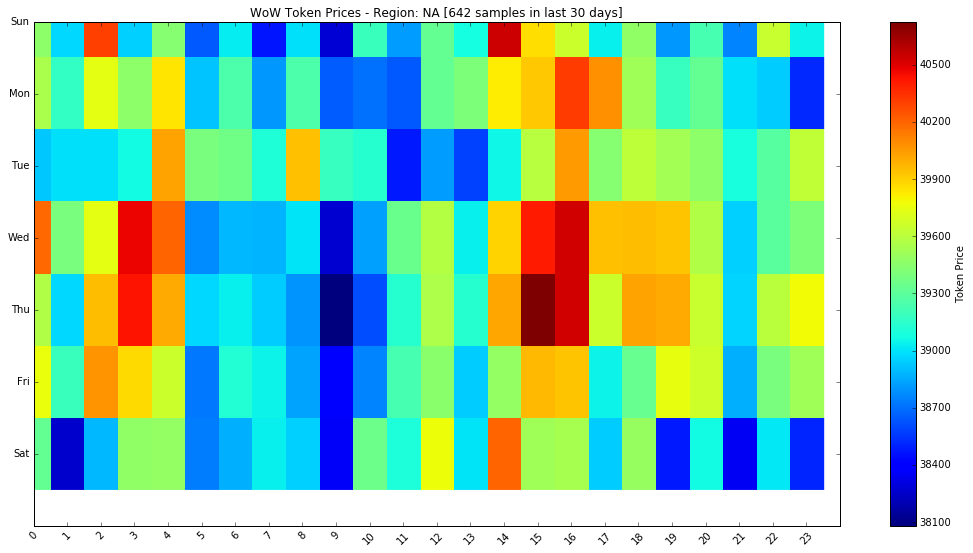

In [167]:
get_regional_pricemap(all_history, 'NA')

## Chinese Realms

**All times are in UTC**

 - Grey areas in the chart below represent times where no data is available

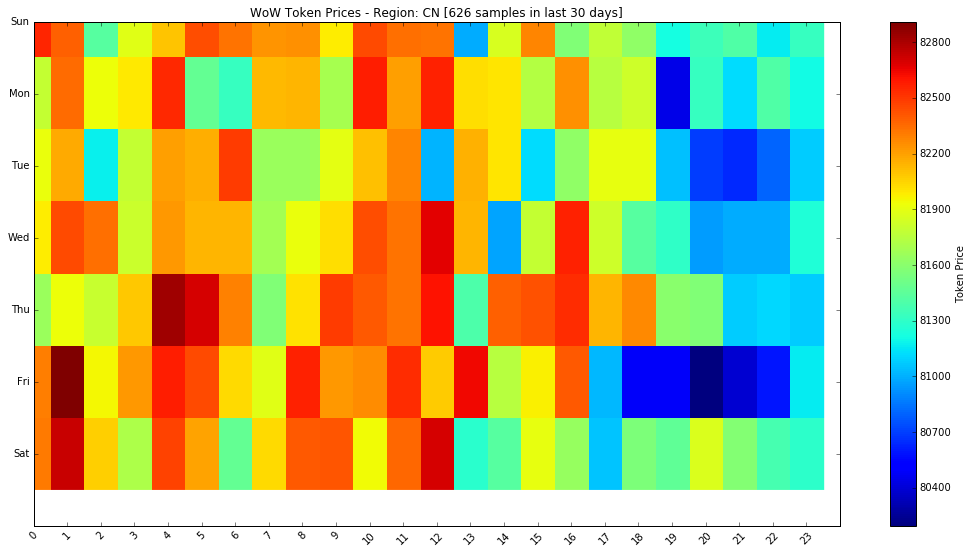

In [168]:
get_regional_pricemap(all_history, 'CN')

## Taiwanese Realms

**All times are in UTC**

 - Grey areas in the chart below represent times where no data is available

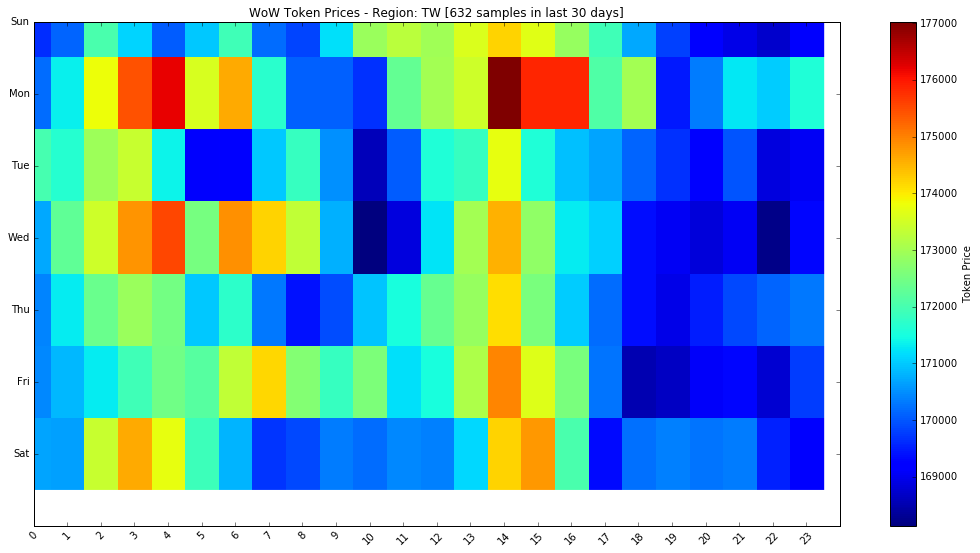

In [169]:
get_regional_pricemap(all_history, 'TW')

## Korean Realms

**All times are in UTC**

 - Grey areas in the chart below represent times where no data is available

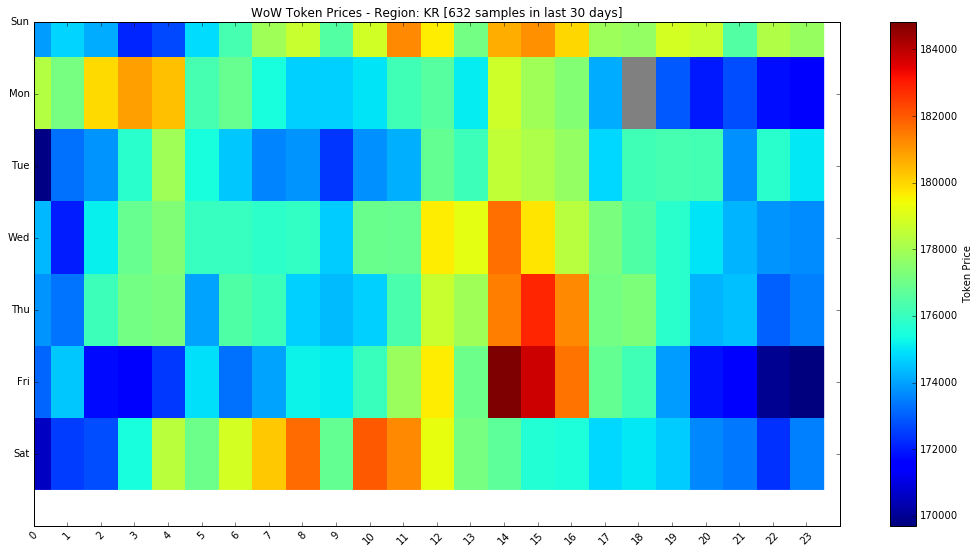

In [170]:
get_regional_pricemap(all_history, 'KR')